In [65]:
# %run ../collect.py --root_dir=/Users/yangjunjie/work/fftisdf-for-dmet/fftisdf-with-dmet-main/benchmark/krhf-dmet/diamond \
#      --filename=out.log --output=../data/diamond-krhf-dmet.json

In [66]:
import matplotlib.pyplot as plt
import numpy as np
import json

from pathlib import Path

figpath = Path("/Users/yangjunjie/Desktop/fftisdf-embedding/fig/")
assert figpath.exists()

import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['font.family'] = 'serif'

data = None
with open('../data/diamond-krhf-dmet.json', 'r') as f:
    data = json.load(f)

kcalmol_to_hartree = 1 / 627.5
color = {'FFTISDF': 'b', 'GDF': 'r', 'RSDF': 'r', 'FFTDF': 'g'}

for k, v in data.items():
    for kk, vv in v.items():
        print(kk, vv)
    break

method fftisdf-80-10
basis cc-pvdz
natm 2.0
nkpt 48.0
nao 26.0
time_build_df 22.57
df_size_in_gb 0.0532
naux 260.0
time_get_j 0.3
time_get_k 0.22
time_krhf 4.76
ene_krhf -11.03044374
time_get_eri 0.5
time_dmet 28.82
ene_dmet -11.21610653


   fftisdf-60-14: a = 1.0083, b = -2.8239
         gdf-2.0: a = 1.7960, b = -6.7509
   fftisdf-60-14: a = 0.9352, b = -7.8814
         gdf-2.0: a = 2.0065, b = -7.0249
        fftdf-80: a = 1.9883, b = -5.3758
   fftisdf-60-14: a = 0.8028, b = -7.7104
         gdf-2.0: a = 1.1304, b = -6.7347
        fftdf-80: a = 0.7698, b = -7.5286
   fftisdf-60-14: a = 0.9018, b = -6.5187
         gdf-2.0: a = 1.9314, b = -6.7893
        fftdf-80: a = 1.9986, b = -2.2487


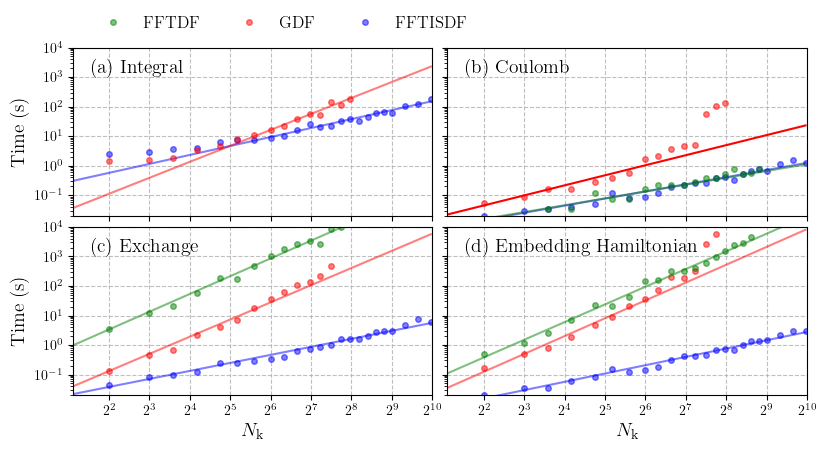

In [67]:
def get_xy_from_keyword(method, keyword):
    d = {}
    for k, v in data.items():
        x = v.get("nkpt")
        y = v.get(keyword)
        natm = v.get("natm")

        m = v.get("method")
        if not m == method:
            continue

        if x is not None and y is not None and natm is not None:
            d[x] = y / natm

    return d

fig, axs = plt.subplots(2, 2, figsize=(8, 4), sharex=True, sharey=True)
fontsize = 14

# k0 = "fftdf-100"
# k1 = "fftdf-60"
# k2 = "fftisdf-60-10"
# k3 = "fftisdf-60-14"
# k4 = "gdf-2.0"
kk = ["fftdf-80", "fftdf-60", "fftisdf-60-10", "fftisdf-60-14", "gdf-2.0"]

style_line = {
    "marker": "",
    "linestyle": "-",
    "markersize": 4,
    "alpha": 0.5,
}

style_circle = {
    "marker": "o",
    "linestyle": "",
    "markersize": 4,
    "alpha": 0.5,
}

d0 = get_xy_from_keyword(kk[2], "time_build_df")
xx = np.array(list(d0.keys()))
y0 = np.array(list(d0.values()))
ix = np.argsort(xx)
xx = xx[ix]
y0 = y0[ix]

dd = [get_xy_from_keyword(k, "time_build_df") for k in kk]
yy = [np.array([d.get(x, np.nan) for x in xx]) for d in dd]

ax = axs[0, 0]
ix = 3
assert kk[ix] == "fftisdf-60-14"
ax.semilogy(np.log2(xx), yy[ix], label=r"FFTISDF", color=color["FFTISDF"], **style_circle)
a, b = np.polyfit(np.log2(xx[10:]), np.log2(yy[ix][10:]), 1)
ax.semilogy(np.log2(xx), 2 ** (a * np.log2(xx) + b), color=color["FFTISDF"], **style_line)
print("%16s: a = %6.4f, b = %6.4f" % (kk[ix], a, b))

ix = 4
assert kk[ix] == "gdf-2.0"
ax.semilogy(np.log2(xx), yy[ix], label=r"GDF", color=color["GDF"], **style_circle)
a, b = np.polyfit(np.log2(xx[7:14]), np.log2(yy[ix][7:14]), 1)
ax.semilogy(np.log2(xx), 2 ** (a * np.log2(xx) + b), color=color["GDF"], **style_line)
print("%16s: a = %6.4f, b = %6.4f" % (kk[ix], a, b))

xx = range(1, 11)
ax.set_xlim(xx[0], xx[-1])
ax.set_xticks(xx)
ax.set_xticklabels([2**x for x in xx])
ax.set_ylim(1e-1, 200)
ax.set_ylabel("Time (s)", fontsize=fontsize)
ax.grid(True, which="major", ls="--", alpha=0.8, linewidth=0.8)


d0 = get_xy_from_keyword(kk[2], "time_get_k")
xx = np.array(list(d0.keys()))
y0 = np.array(list(d0.values()))
ix = np.argsort(xx)
xx = xx[ix]
y0 = y0[ix]

dd = [get_xy_from_keyword(k, "time_get_k") for k in kk]
yy = [np.array([d.get(x, np.nan) for x in xx]) for d in dd]

ax = axs[1, 1]

ix = 3
assert kk[ix] == "fftisdf-60-14"
ax.semilogy(np.log2(xx), yy[ix], label=r"FFTISDF", color=color["FFTISDF"], **style_circle)
a, b = np.polyfit(np.log2(xx), np.log2(yy[ix]), 1)
ax.semilogy(np.log2(xx), 2 ** (a * np.log2(xx) + b), color=color["FFTISDF"], **style_line)
print("%16s: a = %6.4f, b = %6.4f" % (kk[ix], a, b))

ix = 4
assert kk[ix] == "gdf-2.0"
ax.semilogy(np.log2(xx), yy[ix], label=r"GDF", color=color["GDF"], **style_circle)
a, b = np.polyfit(np.log2(xx[0:10]), np.log2(yy[ix][0:10]), 1)
ax.semilogy(np.log2(xx), 2 ** (a * np.log2(xx) + b), color=color["GDF"], **style_line)
print("%16s: a = %6.4f, b = %6.4f" % (kk[ix], a, b))

ix = 0
assert kk[ix] == "fftdf-80"
ax.semilogy(np.log2(xx), yy[ix], label=r"FFTDF", color=color["FFTDF"], **style_circle)
a, b = np.polyfit(np.log2(xx[0:10]), np.log2(yy[ix][0:10]), 1)
ax.semilogy(np.log2(xx), 2 ** (a * np.log2(xx) + b), color=color["FFTDF"], **style_line)
print("%16s: a = %6.4f, b = %6.4f" % (kk[ix], a, b))

xx = range(1, 11)
ax.set_xlim(xx[0], xx[-1])
ax.set_xticks(xx)
ax.set_xticklabels([2**x for x in xx])
ax.set_ylim(2e-2, 1e4)
# ax.set_ylabel("Time (s)", fontsize=fontsize)
ax.grid(True, which="major", ls="--", alpha=0.8, linewidth=0.8)

d0 = get_xy_from_keyword(kk[2], "time_get_j")
xx = np.array(list(d0.keys()))
y0 = np.array(list(d0.values()))
ix = np.argsort(xx)
xx = xx[ix]
y0 = y0[ix]

dd = [get_xy_from_keyword(k, "time_get_j") for k in kk]
yy = [np.array([d.get(x, np.nan) for x in xx]) for d in dd]

ax = axs[0, 1]

ix = 3
assert kk[ix] == "fftisdf-60-14"
ax.semilogy(np.log2(xx), yy[ix], label=r"FFTISDF", color=color["FFTISDF"], **style_circle)
a, b = np.polyfit(np.log2(xx), np.log2(yy[ix]), 1)
ax.semilogy(np.log2(xx), 2 ** (a * np.log2(xx) + b), color=color["FFTISDF"], **style_line)
print("%16s: a = %6.4f, b = %6.4f" % (kk[ix], a, b))

ix = 4
assert kk[ix] == "gdf-2.0"
ax.semilogy(np.log2(xx), yy[ix], label=r"GDF", color=color["GDF"], **style_circle)
a, b = np.polyfit(np.log2(xx[0:10]), np.log2(yy[ix][0:10]), 1)
ax.semilogy(np.log2(xx), 2 ** (a * np.log2(xx) + b), color=color["GDF"], linestyle="-")
print("%16s: a = %6.4f, b = %6.4f" % (kk[ix], a, b))

ix = 0
assert kk[ix] == "fftdf-80"
ax.semilogy(np.log2(xx), yy[ix], label=r"FFTDF", color=color["FFTDF"], **style_circle)
a, b = np.polyfit(np.log2(xx[0:10]), np.log2(yy[ix][0:10]), 1)
ax.semilogy(np.log2(xx), 2 ** (a * np.log2(xx) + b), color=color["FFTDF"], **style_line)
print("%16s: a = %6.4f, b = %6.4f" % (kk[ix], a, b))

# xx = range(1, 11)
# ax.set_xlim(xx[0], xx[-1])
# ax.set_xticks(xx)
# ax.set_xticklabels([2**x for x in xx])
# ax.set_ylim(2e-2, 1e4)
# # ax.set_ylabel("Time (s)", fontsize=fontsize)
ax.grid(True, which="major", ls="--", alpha=0.8, linewidth=0.8)


d0 = get_xy_from_keyword(kk[2], "time_get_eri")
xx = np.array(list(d0.keys()))
y0 = np.array(list(d0.values()))
ix = np.argsort(xx)
xx = xx[ix]
y0 = y0[ix]

dd = [get_xy_from_keyword(k, "time_get_eri") for k in kk]
yy = [np.array([d.get(x, np.nan) for x in xx]) for d in dd]

ax = axs[1, 0]

ix = 3
assert kk[ix] == "fftisdf-60-14"
l1 = ax.semilogy(np.log2(xx), yy[ix], label=r"FFTISDF", color=color["FFTISDF"], **style_circle)
a, b = np.polyfit(np.log2(xx), np.log2(yy[ix]), 1)
ax.semilogy(np.log2(xx), 2 ** (a * np.log2(xx) + b), color=color["FFTISDF"], **style_line)
print("%16s: a = %6.4f, b = %6.4f" % (kk[ix], a, b))

ix = 4
assert kk[ix] == "gdf-2.0"
l2 = ax.semilogy(np.log2(xx), yy[ix], label=r"GDF", color=color["GDF"], **style_circle)
a, b = np.polyfit(np.log2(xx[0:10]), np.log2(yy[ix][0:10]), 1)
ax.semilogy(np.log2(xx), 2 ** (a * np.log2(xx) + b), color=color["GDF"], **style_line)
print("%16s: a = %6.4f, b = %6.4f" % (kk[ix], a, b))

ix = 0
assert kk[ix] == "fftdf-80"
l3 = ax.semilogy(np.log2(xx), yy[ix], label=r"FFTDF", color=color["FFTDF"], **style_circle)
a, b = np.polyfit(np.log2(xx[0:10]), np.log2(yy[ix][0:10]), 1)
ax.semilogy(np.log2(xx), 2 ** (a * np.log2(xx) + b), color=color["FFTDF"], **style_line)
print("%16s: a = %6.4f, b = %6.4f" % (kk[ix], a, b))

l1 = ax.semilogy(np.log2(xx), yy[ix] * 1e9, label=r"FFTISDF", color=color["FFTISDF"], **style_circle)
l2 = ax.semilogy(np.log2(xx), yy[ix] * 1e9, label=r"GDF", color=color["GDF"], **style_circle)
l3 = ax.semilogy(np.log2(xx), yy[ix] * 1e9, label=r"FFTDF", color=color["FFTDF"], **style_circle)

xx = range(1, 11)
ax.set_xticks(xx)
ax.set_xticklabels([r"$2^{%d}$" % x for x in xx])
ax.set_ylim(2e-2, 1e4)
ax.set_xlim(xx[0] * 1.1, xx[-1])
ax.grid(True, which="major", ls="--", alpha=0.8, linewidth=0.8)

axs[1, 0].set_xlabel(r"$N_{\mathrm{k}}$", fontsize=fontsize)
axs[1, 1].set_xlabel(r"$N_{\mathrm{k}}$", fontsize=fontsize)
axs[1, 0].set_ylabel("Time (s)", fontsize=fontsize)

for i, ax in enumerate(axs.flatten()):
    content = ["(a) Integral", "(b) Coulomb", "(c) Exchange", "(d) Embedding Hamiltonian"]
    ax.text(
        0.05, 0.85,
        content[i],
        fontsize=fontsize,
        transform=ax.transAxes,
        ha="left",
    )

fig.legend(
    [l3[0], l2[0],  l1[0]],
    ["FFTDF", "GDF", "FFTISDF"],
    fontsize=fontsize - 2,
    frameon=False,
    loc="upper left",
    bbox_to_anchor=(0.08, 1.10),
    ncol=4,
)

fig.tight_layout(
    pad=0.1,
)

fig.savefig(figpath / "diamond-krhf-dmet-time.pdf", bbox_inches="tight", dpi=300)

   2, -5.288412, -5.288411, -5.288410, -5.28840996, -5.288410
   4, -5.414632, -5.414627, -5.414624, -5.41462681, -5.414627
   8, -5.478612, -5.478628, -5.478607, -5.47861068, -5.478611
  12, -5.499780, -5.499777, -5.499759, -5.49976304, -5.499763
  18, -5.510757, -5.510761, -5.510734, -5.51073795, -5.510738
  27, -5.511139, -5.511151, -5.511119, -5.51112264, -5.511123
  36, -5.513975, -5.513972, -5.513952, -5.51395592, -5.513956
  48, -5.515064, -5.515069, -5.515051, -5.51505441, -5.515055
  64, -5.514371, -5.514349, -5.514330, -5.51433315, -5.514334
  80, -5.514629, -5.514617, -5.514601, -5.51460511, -5.514606
 100, -5.514592, -5.514568, -5.514549, -5.51455253, -5.514553
 125, -5.514160, -5.514164, -5.514145, -5.51414878, -5.514149
 150, -5.514072, -5.514080, -5.514044, -5.51404803, -5.514049
 180, -5.513917, -5.513904, -5.513887, -5.51389021, -5.513891
 216, -5.513692, -5.513698, -5.513663, -5.51366616, -5.513667
 252, -5.513586, -5.513593, -5.513557, -5.51356031, -5.513561
 294, -5

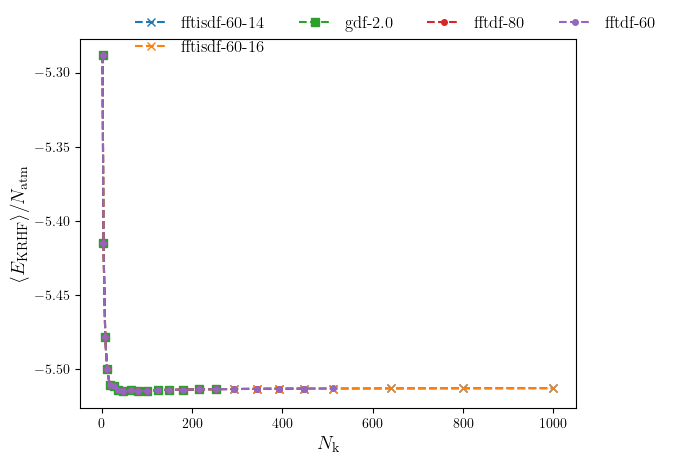

In [68]:
def get_xy_from_keyword(method, keyword):
    d = {}
    for k, v in data.items():
        x = v.get("nkpt")
        y = v.get(keyword)
        natm = v.get("natm")

        m = v.get("method")
        if not m == method:
            continue

        if x is not None and y is not None and natm is not None:
            d[x] = y / natm

    return d

kk = ["fftisdf-60-14", "fftisdf-60-16", "gdf-2.0", "fftdf-80", "fftdf-60"]
dd = {}

for k in kk:
    x = get_xy_from_keyword(k, "ene_krhf")
    for n, y in x.items():
        if n not in dd:
            dd[n] = {}
        dd[n][k] = y


fig, ax = plt.subplots(1, 1, sharex=True, sharey=True)
fontsize = 14

nn = sorted(dd.keys())
for n in nn:
    dn = dd[n]
    xx = [dn.get(k, np.nan) for k in kk]
    print("%4d, % 8.6f, % 8.6f, % 8.6f, % 8.8f, % 8.6f" % (n, xx[0], xx[1], xx[2], xx[3], xx[4]))

for k in kk:
    marker = "o"
    marker_size = 4
    if "gdf" in k:
        marker = "s"
        marker_size = 6
    elif "fftisdf" in k:
        marker = "x"
        marker_size = 6
    ax.plot(nn, [dd[n].get(k, np.nan) for n in nn], label=k, marker=marker, linestyle="--", markersize=marker_size)

# ax.set_xlim(2, 1000)
# ax.set_ylim(-5.5138, -5.51275)
ax.set_xlabel(r"$N_{\mathrm{k}}$", fontsize=fontsize)
ax.set_ylabel(r"$\langle E_{\mathrm{KRHF}} \rangle / N_{\mathrm{atm}}$", fontsize=fontsize)
ax.legend(fontsize=fontsize - 2, frameon=False, loc="upper left", bbox_to_anchor=(0.08, 1.10), ncol=4)






   2,  -5.369027,  -5.368858,  -5.369526,  -5.369531,  -5.369551
   4,  -5.496432,  -5.496192,  -5.497088,  -5.497134,  -5.497118
   8,  -5.560038,  -5.560049,  -5.560027,  -5.560031,  -5.560031
  12,  -5.584934,  -5.584934,  -5.584913,  -5.584917,  -5.584918
  18,  -5.598628,  -5.598629,  -5.598604,  -5.598608,  -5.598608
  27,  -5.600826,  -5.600837,  -5.600807,  -5.600811,  -5.600811
  36,  -5.605439,  -5.605439,  -5.605416,  -5.605420,  -5.605420
  48,  -5.607857,  -5.607863,  -5.607841,  -5.607845,  -5.607845
  64,  -5.608168,  -5.608143,  -5.608121,  -5.608125,  -5.608125
  80,  -5.609338,  -5.609327,  -5.609312,  -5.609316,  -5.609316
 100,  -5.610044,  -5.610019,  -5.609996,  -5.610000,  -5.610000
 125,  -5.610207,  -5.610212,  -5.610189,  -5.610193,  -5.610193
 150,  -5.610663,  -5.610670,  -5.610637,  -5.610640,  -5.610640
 180,  -5.610971,  -5.610959,  -5.610943,  -5.610946,  -5.610946
 216,  -5.611145,  -5.611152,        nan,  -5.611121,  -5.611122
 252,  -5.611407,  -5.611

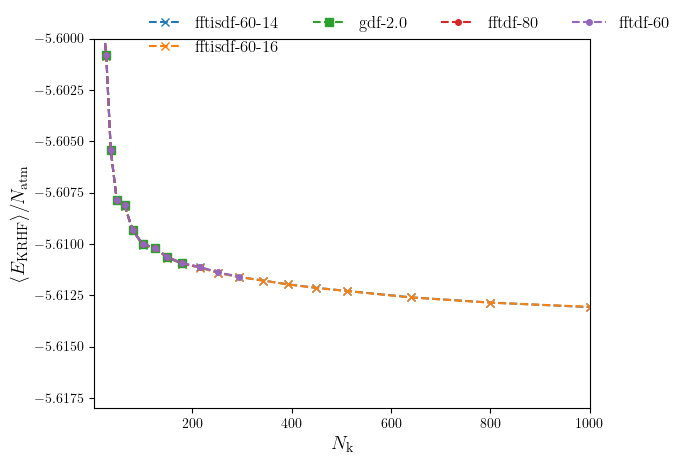

In [69]:

kk = ["fftisdf-60-14", "fftisdf-60-16", "gdf-2.0", "fftdf-80", "fftdf-60"]
dd = {}

for k in kk:
    x = get_xy_from_keyword(k, "ene_dmet")
    for n, y in x.items():
        if n not in dd:
            dd[n] = {}
        dd[n][k] = y


fig, ax = plt.subplots(1, 1, sharex=True, sharey=True)
fontsize = 14

nn = sorted(dd.keys())
for n in nn:
    dn = dd[n]
    xx = [dn.get(k, np.nan) for k in kk]
    ss = ["% .6f" % x for x in xx]
    ss = [s.rjust(10) for s in ss]
    print("%4d, " % n + ", ".join(ss))

for k in kk:
    marker = "o"
    marker_size = 4
    if "gdf" in k:
        marker = "s"
        marker_size = 6
    elif "fftisdf" in k:
        marker = "x"
        marker_size = 6
    ax.plot(nn, [dd[n].get(k, np.nan) for n in nn], label=k, marker=marker, linestyle="--", markersize=marker_size)

ax.set_xlim(2, 1000)
ax.set_ylim(-5.618, -5.60)
ax.set_xlabel(r"$N_{\mathrm{k}}$", fontsize=fontsize)
ax.set_ylabel(r"$\langle E_{\mathrm{KRHF}} \rangle / N_{\mathrm{atm}}$", fontsize=fontsize)
ax.legend(fontsize=fontsize - 2, frameon=False, loc="upper left", bbox_to_anchor=(0.08, 1.10), ncol=4)

   2,  -0.080615,  -0.080446,  -0.081116,  -0.081121,  -0.081140
   4,  -0.081800,  -0.081565,  -0.082463,  -0.082507,  -0.082491
   8,  -0.081426,  -0.081422,  -0.081420,  -0.081420,  -0.081420
  12,  -0.085154,  -0.085157,  -0.085154,  -0.085154,  -0.085154
  18,  -0.087870,  -0.087868,  -0.087870,  -0.087870,  -0.087870
  27,  -0.089687,  -0.089686,  -0.089688,  -0.089688,  -0.089688
  36,  -0.091464,  -0.091467,  -0.091464,  -0.091464,  -0.091464
  48,  -0.092793,  -0.092794,  -0.092791,  -0.092790,  -0.092790
  64,  -0.093796,  -0.093795,  -0.093792,  -0.093792,  -0.093792
  80,  -0.094709,  -0.094710,  -0.094711,  -0.094710,  -0.094710
 100,  -0.095452,  -0.095450,  -0.095447,  -0.095447,  -0.095447
 125,  -0.096046,  -0.096048,  -0.096044,  -0.096044,  -0.096044
 150,  -0.096590,  -0.096590,  -0.096592,  -0.096592,  -0.096592
 180,  -0.097054,  -0.097055,  -0.097056,  -0.097056,  -0.097056
 216,  -0.097453,  -0.097453,        nan,  -0.097455,  -0.097455
 252,  -0.097821,  -0.097

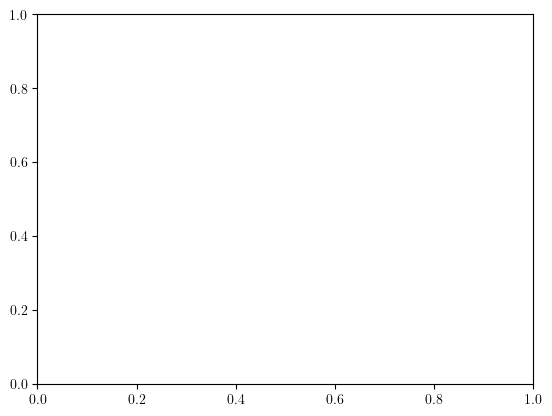

In [70]:
kk = ["fftisdf-60-14", "fftisdf-60-16", "gdf-2.0", "fftdf-80", "fftdf-60"]
mm = ["ene_krhf", "ene_dmet"]
dd = {}

for k in kk:
    for m in mm:
        xx = get_xy_from_keyword(k, m)
        for n, y in xx.items():
            if n not in dd:
                dd[n] = {}

            if k not in dd[n]:
                dd[n][k] = {}

            dd[n][k][m] = y



fig, ax = plt.subplots(1, 1, sharex=True, sharey=True)
fontsize = 14

nn = sorted(dd.keys())
for n in nn:
    dn = dd[n]
    xx = [dn.get(k) for k in kk]
    ee = []
    for k in kk:
        if k not in dd[n]:
            ee.append(np.nan)
        elif not "ene_dmet" in dd[n][k]:
            ee.append(np.nan)
        else:
            ee.append(dd[n][k]["ene_dmet"] - dd[n][k]["ene_krhf"])

    ss = ["% .6f" % x for x in ee]
    ss = [s.rjust(10) for s in ss]
    print("%4d, " % n + ", ".join(ss))

# for k in kk:
#     marker = "o"
#     marker_size = 4
#     if "gdf" in k:
#         marker = "s"
#         marker_size = 6
#     elif "fftisdf" in k:
#         marker = "x"
#         marker_size = 6
#     ax.plot(nn, [dd[n].get(k, np.nan) for n in nn], label=k, marker=marker, linestyle="--", markersize=marker_size)

# ax.set_xlim(2, 1000)
# ax.set_ylim(-5.618, -5.60)
# ax.set_xlabel(r"$N_{\mathrm{k}}$", fontsize=fontsize)
# ax.set_ylabel(r"$\langle E_{\mathrm{KRHF}} \rangle / N_{\mathrm{atm}}$", fontsize=fontsize)
# ax.legend(fontsize=fontsize - 2, frameon=False, loc="upper left", bbox_to_anchor=(0.08, 1.10), ncol=4)

{48.0: {'fftisdf-60-10': {'ene_krhf': -5.51509642, 'ene_kmp2': -5.64645015}, 'fftisdf-60-14': {'ene_krhf': -5.515063755, 'ene_kmp2': -5.64638161}, 'gdf-2.0': {'ene_krhf': -5.51505078, 'ene_kmp2': -5.646358485}, 'fftdf-80': {'ene_krhf': -5.51505441, 'ene_kmp2': -5.646364165}, 'fftdf-60': {'ene_krhf': -5.51505488, 'ene_kmp2': -5.646364655}}, 64.0: {'fftisdf-60-10': {'ene_krhf': -5.51449016, 'ene_kmp2': -5.64635452}, 'fftisdf-60-14': {'ene_krhf': -5.51437138, 'ene_kmp2': -5.64616718}, 'gdf-2.0': {'ene_krhf': -5.514329505, 'ene_kmp2': -5.64611552}, 'fftdf-80': {'ene_krhf': -5.51433315, 'ene_kmp2': -5.646121215}, 'fftdf-60': {'ene_krhf': -5.514333605, 'ene_kmp2': -5.64612169}}, 18.0: {'fftisdf-60-10': {'ene_krhf': -5.51082027, 'ene_kmp2': -5.63706485}, 'fftisdf-60-14': {'ene_krhf': -5.510757455, 'ene_kmp2': -5.63691362}, 'gdf-2.0': {'ene_krhf': -5.51073438, 'ene_kmp2': -5.636883445}, 'fftdf-80': {'ene_krhf': -5.510737955, 'ene_kmp2': -5.63688935}, 'fftdf-60': {'ene_krhf': -5.51073842, 'ene_

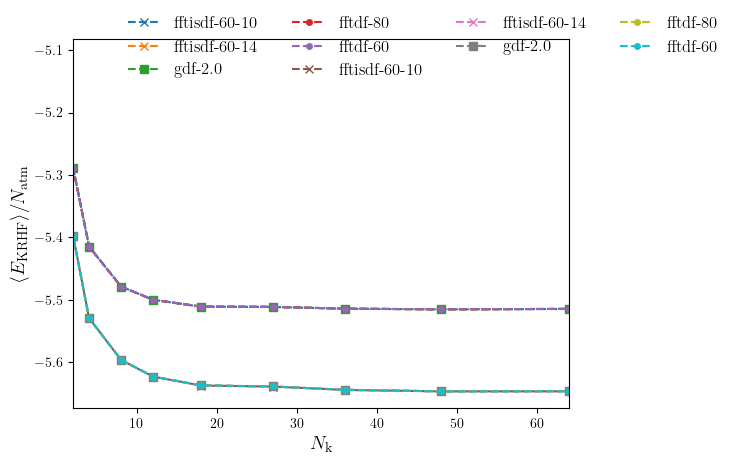

In [71]:
data = None
with open('../data/diamond-ref-kpts.json', 'r') as f:
    data = json.load(f)

def get_xy_from_keyword(method, keyword):
    d = {}
    for k, v in data.items():
        x = v.get("nkpt")
        y = v.get(keyword)
        natm = v.get("natm")

        m = v.get("method")
        if not m == method:
            continue

        if x is not None and y is not None and natm is not None:
            d[x] = y / natm

    return d

kk = ["fftisdf-60-10", "fftisdf-60-14", "gdf-2.0", "fftdf-80", "fftdf-60"]
mm = ["ene_krhf", "ene_kmp2"]
dd = {}

for k in kk:
    for m in mm:
        xx = get_xy_from_keyword(k, m)
        for n, y in xx.items():
            if n not in dd:
                dd[n] = {}

            if k not in dd[n]:
                dd[n][k] = {}

            dd[n][k][m] = y

print(dd)



fig, ax = plt.subplots(1, 1, sharex=True, sharey=True)
fontsize = 14

nn = sorted(dd.keys())
for n in nn:
    dn = dd[n]
    xx = [dn.get(k) for k in kk]
    ee = []
    for k in kk:
        if k not in dd[n]:
            ee.append(np.nan)
        elif not "ene_kmp2" in dd[n][k]:
            ee.append(np.nan)
        else:
            ee.append(dd[n][k]["ene_krhf"])

    ss = ["% .6f" % x for x in ee]
    ss = [s.rjust(10) for s in ss]
    print("%4d, " % n + ", ".join(ss))

for m in mm:
    for k in kk:
        marker = "o"
        marker_size = 4
        if "gdf" in k:
            marker = "s"
            marker_size = 6
        elif "fftisdf" in k:
            marker = "x"
            marker_size = 6

        yy = []
        for n in nn:
            y = dd[n].get(k, {}).get(m, np.nan)
            yy.append(y)
        ax.plot(nn, yy, label=k, marker=marker, linestyle="--", markersize=marker_size)

ax.set_xlim(2, 64)
# ax.set_ylim(-5.618, -5.60)
ax.set_xlabel(r"$N_{\mathrm{k}}$", fontsize=fontsize)
ax.set_ylabel(r"$\langle E_{\mathrm{KRHF}} \rangle / N_{\mathrm{atm}}$", fontsize=fontsize)
ax.legend(fontsize=fontsize - 2, frameon=False, loc="upper left", bbox_to_anchor=(0.08, 1.10), ncol=4)

{48.0: {'fftisdf-60-10': {'ene_krhf': -5.51509642, 'ene_dmet': -5.607906995}, 'fftisdf-60-14': {'ene_krhf': -5.515063755, 'ene_dmet': -5.607856585}, 'gdf-2.0': {'ene_krhf': -5.51505078, 'ene_dmet': -5.60784134}, 'fftdf-80': {'ene_krhf': -5.51505441, 'ene_dmet': -5.607844715}, 'fftdf-60': {'ene_krhf': -5.51505488, 'ene_dmet': -5.60784522}}, 80.0: {'fftisdf-60-10': {'ene_krhf': -5.514753815, 'ene_dmet': -5.609488615}, 'fftisdf-60-14': {'ene_krhf': -5.514628975, 'ene_dmet': -5.609337735}, 'gdf-2.0': {'ene_krhf': -5.51460147, 'ene_dmet': -5.60931216}, 'fftdf-80': {'ene_krhf': -5.514605105, 'ene_dmet': -5.60931551}, 'fftdf-60': {'ene_krhf': -5.514605575, 'ene_dmet': -5.609316015}}, 252.0: {'fftisdf-60-10': {'ene_krhf': -5.51370038, 'ene_dmet': -5.6115554}, 'fftisdf-60-14': {'ene_krhf': -5.513586495, 'ene_dmet': -5.611407165}, 'gdf-2.0': {'ene_krhf': -5.513556675}, 'fftdf-80': {'ene_krhf': -5.51356031}, 'fftdf-60': {'ene_krhf': -5.51356079, 'ene_dmet': -5.6113831}}, 448.0: {'fftisdf-60-10': 

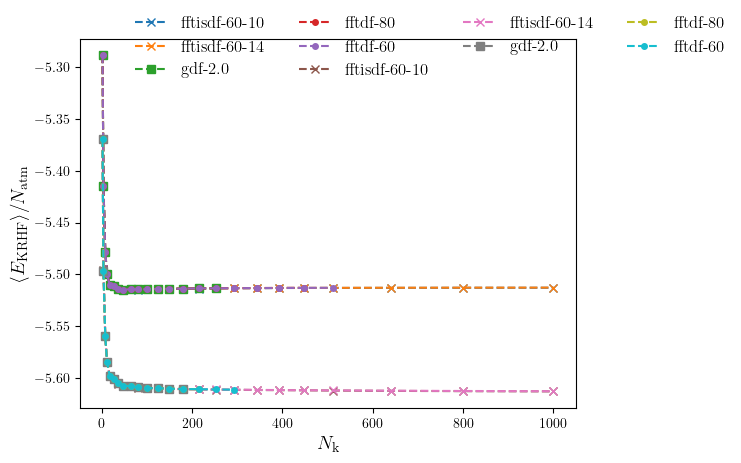

In [72]:
data = None
with open('../data/diamond-krhf-dmet.json', 'r') as f:
    data = json.load(f)

def get_xy_from_keyword(method, keyword):
    d = {}
    for k, v in data.items():
        x = v.get("nkpt")
        y = v.get(keyword)
        natm = v.get("natm")

        m = v.get("method")
        if not m == method:
            continue

        if x is not None and y is not None and natm is not None:
            d[x] = y / natm

    return d

kk = ["fftisdf-60-10", "fftisdf-60-14", "gdf-2.0", "fftdf-80", "fftdf-60"]
mm = ["ene_krhf", "ene_dmet"]
dd = {}

for k in kk:
    for m in mm:
        xx = get_xy_from_keyword(k, m)
        for n, y in xx.items():
            if n not in dd:
                dd[n] = {}

            if k not in dd[n]:
                dd[n][k] = {}

            dd[n][k][m] = y

print(dd)



fig, ax = plt.subplots(1, 1, sharex=True, sharey=True)
fontsize = 14

nn = sorted(dd.keys())
for n in nn:
    dn = dd[n]
    xx = [dn.get(k) for k in kk]
    ee = []
    for k in kk:
        if k not in dd[n]:
            ee.append(np.nan)
        else:
            ee.append(dd[n][k]["ene_krhf"])

    ss = ["% .6f" % x for x in ee]
    ss = [s.rjust(10) for s in ss]
    print("%4d, " % n + ", ".join(ss))

for m in mm:
    for k in kk:
        marker = "o"
        marker_size = 4
        if "gdf" in k:
            marker = "s"
            marker_size = 6
        elif "fftisdf" in k:
            marker = "x"
            marker_size = 6

        yy = []
        for n in nn:
            y = dd[n].get(k, {}).get(m, np.nan)
            yy.append(y)
        ax.plot(nn, yy, label=k, marker=marker, linestyle="--", markersize=marker_size)

# ax.set_xlim(2, 64)
# ax.set_ylim(-5.618, -5.60)
ax.set_xlabel(r"$N_{\mathrm{k}}$", fontsize=fontsize)
ax.set_ylabel(r"$\langle E_{\mathrm{KRHF}} \rangle / N_{\mathrm{atm}}$", fontsize=fontsize)
ax.legend(fontsize=fontsize - 2, frameon=False, loc="upper left", bbox_to_anchor=(0.08, 1.10), ncol=4)